In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# world_food_data = pd.read_csv('World foodfeed/FAO.csv', encoding='latin-1')
# foodData=pd.DataFrame(world_food_data['Item'].astype('category'))
# sb.catplot(y = 'Item', data = foodData, kind = "count", height = 20)

In [3]:
# world_food_data['Item']=world_food_data['Item'].astype('category')
# world_food_data.dtypes

In [4]:
# world_food_data.head()

In [5]:
# WorldData = pd.DataFrame(world_food_data[['Area','Item','Y1961','Y1971','Y1981','Y1991','Y1995','Y2001','Y2005','Y2010','Y2013']])

In [6]:
# WorldData.sample(10)

### 1. Highlight the top ingrediants for each cuisine from the main data set and drop the rest here
### 2. Find the top production for each of those ingredient in each year

#  




# problem 1



In [7]:
everything = pd.read_json('Whats_cooking/train.json')
print(everything.shape)

(39774, 3)


In [8]:
everything.head(30)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [9]:
# # changing all the name in the main data
# ls = ['olive oil','vegetable oil','chicken','tomato','cheese','garlic','bean','pepper','lettuce','cream','ginger','milk',
# 'almond','peanut','chestnut','walnut','lime','flour','onion','potato','rice','butter',
# 'soda','ice','noodle','beef','pork','steak','egg','water','ham','carrot','chocolate','lamb',
# 'rum','mustard','apple','corn','shrimp','lemon','cucumber','vinegar','spinach','bread','pea',
# 'coconut','chili','mushroom']

# for a in range(len(ls)): 
#     for i in range(len(everything.ingredients)): 
#         for j in range(len(everything.ingredients[i])): 
#             if ls[a] in everything.ingredients[i][j]:
#                 everything.ingredients[i][j] = ls[a]
# everything.head(10)

In [10]:
ingredientData = pd.DataFrame(everything[['ingredients']])
ingredientData.head()

,ingredients
0,"[romaine lettuce, black olives, grape tomatoes..."
1,"[plain flour, ground pepper, salt, tomatoes, g..."
2,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,"[water, vegetable oil, wheat, salt]"
4,"[black pepper, shallots, cornflour, cayenne pe..."


In [11]:
ingredientList = []
for i in range(0,39774):
    for ingredient in ingredientData.iloc[i][0]:
        if ingredient not in ingredientList:
            ingredientList.append(ingredient)

In [12]:
len(ingredientList)

6714

In [13]:
cuisineList = []
for i in range(0,39774):
    if everything['cuisine'].iloc[i] not in cuisineList:
        cuisineList.append(everything['cuisine'].iloc[i])

In [14]:
print(cuisineList)
print()
print(everything['cuisine'].iloc[0])

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']

greek


In [15]:
everything_dict = {'ingredients':ingredientList}
for cuisine in cuisineList:
    everything_dict[cuisine] = []
    for i in range(0,len(ingredientList)):
        everything_dict[cuisine].append(0)

In [16]:
for cuisine in cuisineList:
    for i in range(0,39774):
        if everything['cuisine'].iloc[i]== cuisine:
            for ingredient in everything['ingredients'].iloc[i]:
                for index in range(0,len(ingredientList)):
                    if ingredientList[index]== ingredient:
                        everything_dict[cuisine][index]+=1
                    
        

In [17]:
completeDataFrame = pd.DataFrame(everything_dict)
completeDataFrame = completeDataFrame.set_index('ingredients')
completeDataFrame

,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
ingredients,,,,,,,,,,,,,,,,,,,,
romaine lettuce,39,8,0,3,0,4,33,103,13,0,20,17,12,0,12,0,1,5,0,0
black olives,31,3,0,0,0,4,67,92,0,0,0,0,2,0,21,0,0,0,8,1
grape tomatoes,26,14,1,5,0,6,98,53,2,0,4,0,5,0,13,1,0,0,0,0
garlic,216,259,325,726,139,128,1471,1317,763,34,414,239,370,82,214,166,51,303,143,20
pepper,203,549,199,205,125,133,965,806,158,88,81,71,189,56,209,62,87,99,94,59
purple onion,186,95,13,170,26,55,350,618,33,11,84,45,38,8,64,14,3,8,67,8
seasoning,3,17,2,5,4,2,12,31,11,2,4,2,25,1,1,5,2,5,2,1
garbanzo beans,23,1,5,36,0,9,18,17,1,0,1,0,2,0,1,0,0,0,34,0
feta cheese crumbles,252,3,0,3,0,3,68,18,1,0,0,0,1,0,3,0,0,0,6,0


# Salt and water are too common, so we drop it

In [18]:
completeDataFrameWithoutSalt=completeDataFrame.drop(completeDataFrame.index[[11,29]])

## Find out 3 least used ingredients, remove commonly used ingredients, most used ingredients, find out 3 most used ingredients in each cuisine

# Exploratory Analysis

In [19]:
completeDataFrameWithoutSalt.dtypes

greek           int64
southern_us     int64
filipino        int64
indian          int64
jamaican        int64
spanish         int64
italian         int64
mexican         int64
chinese         int64
british         int64
thai            int64
vietnamese      int64
cajun_creole    int64
brazilian       int64
french          int64
japanese        int64
irish           int64
korean          int64
moroccan        int64
russian         int64
dtype: object

# Lollipop only for greek

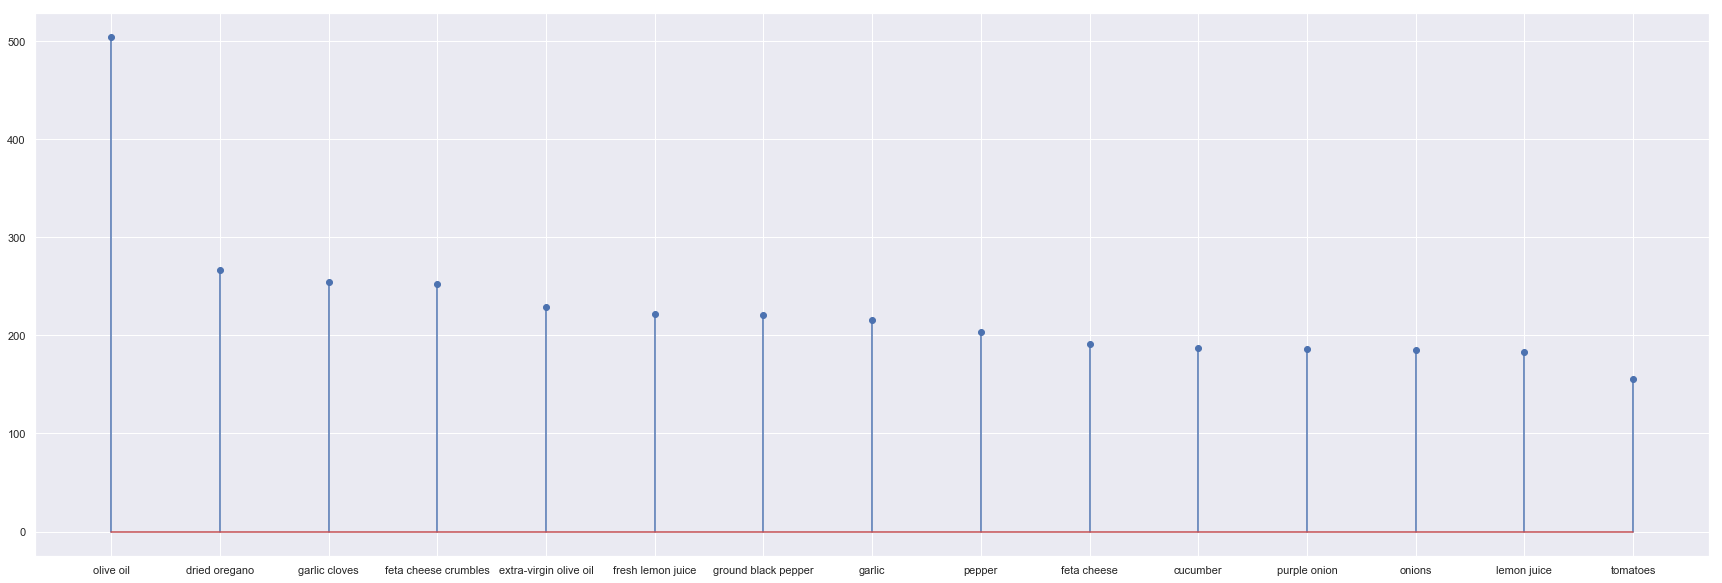

In [20]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['greek'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
total_top15_ingredients=[]
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [21]:
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

# Treemap for greek

In [22]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# southern_us

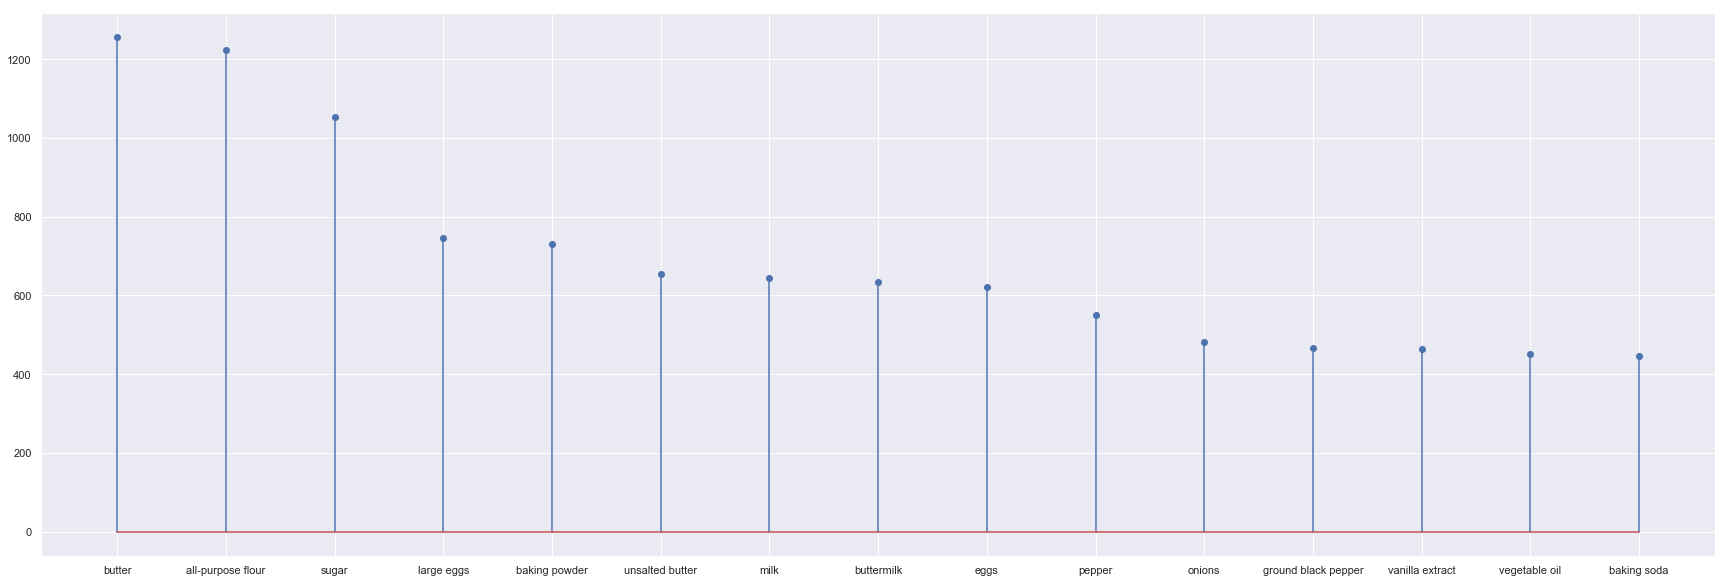

In [23]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['southern_us'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [24]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# Filipino

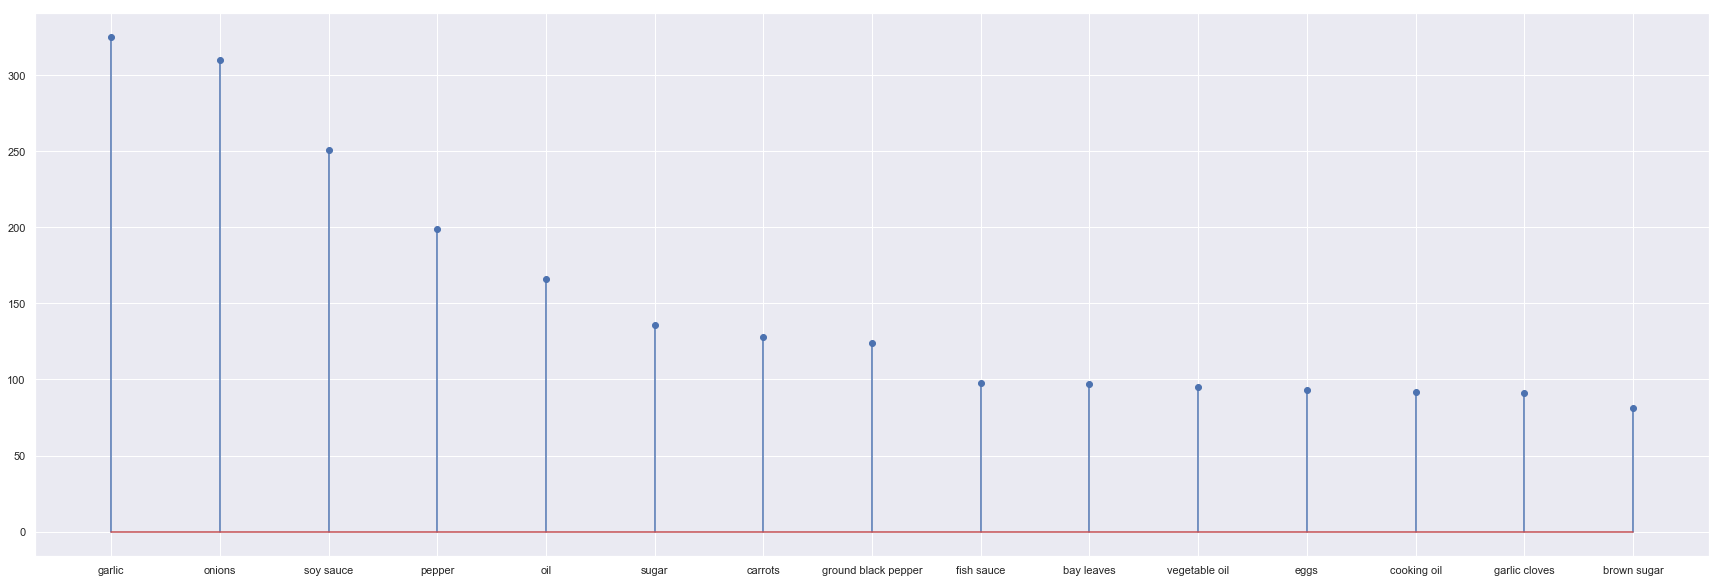

In [25]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['filipino'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [26]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# indian

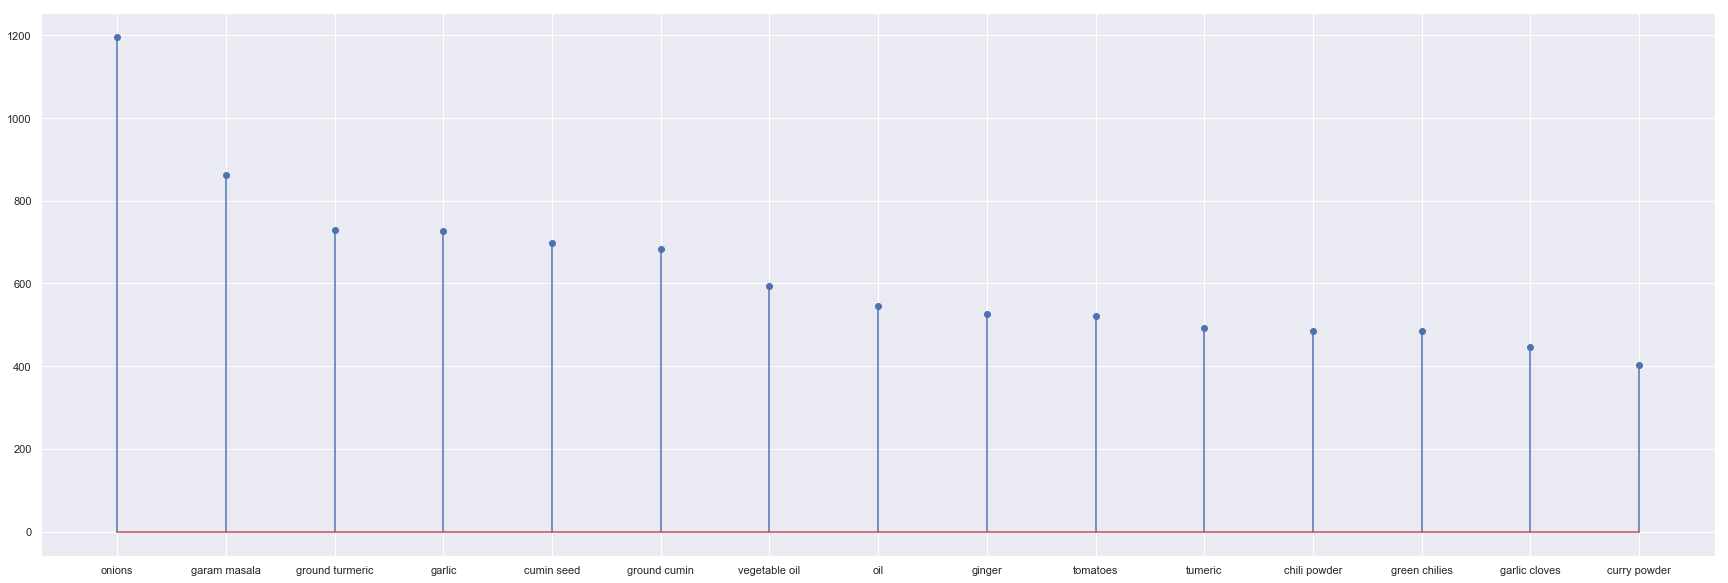

In [27]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['indian'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [28]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# jamaican

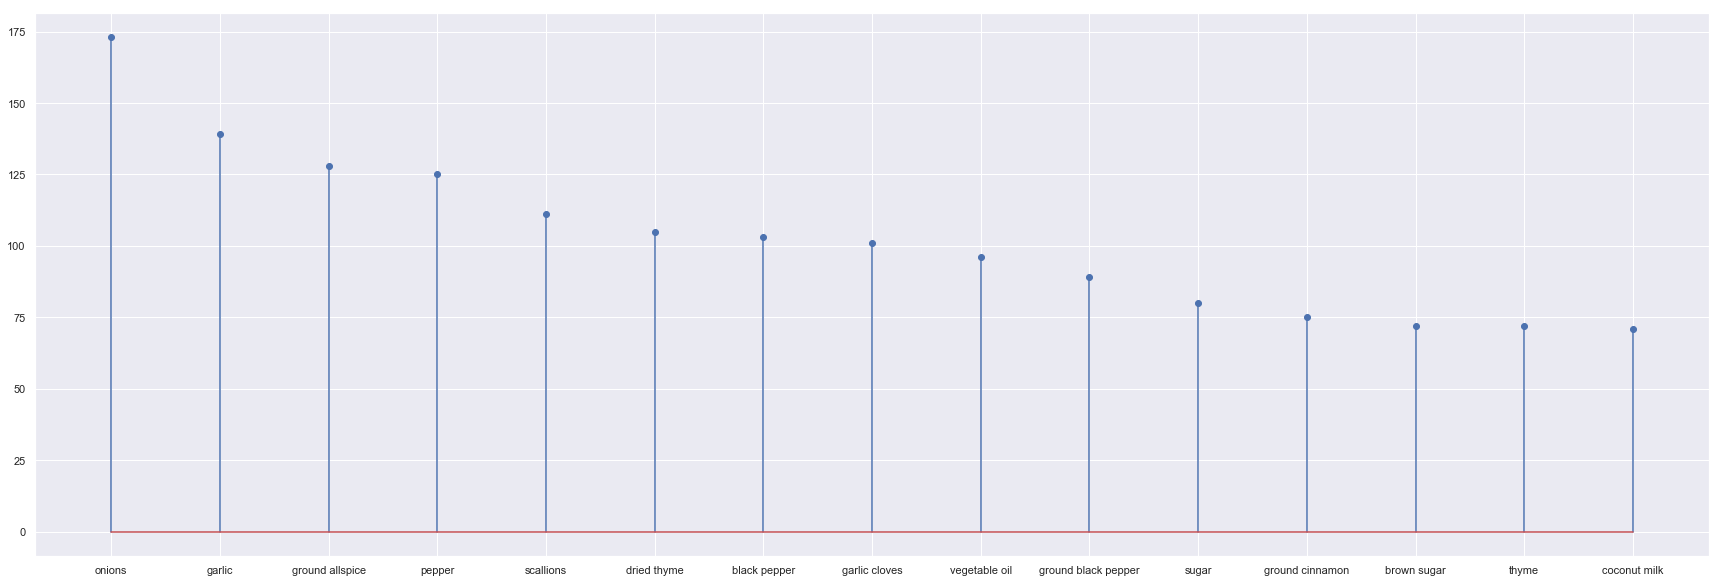

In [29]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['jamaican'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [30]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# spanish

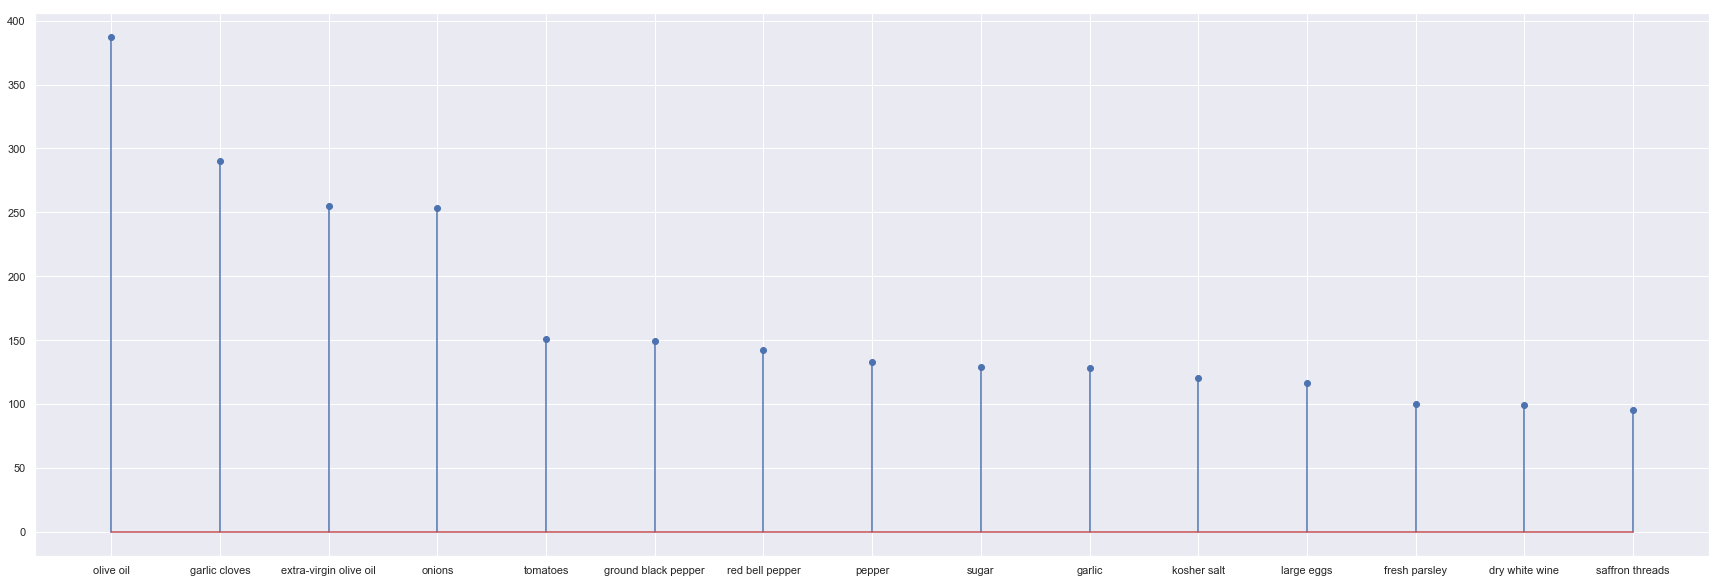

In [31]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['spanish'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [32]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# italian

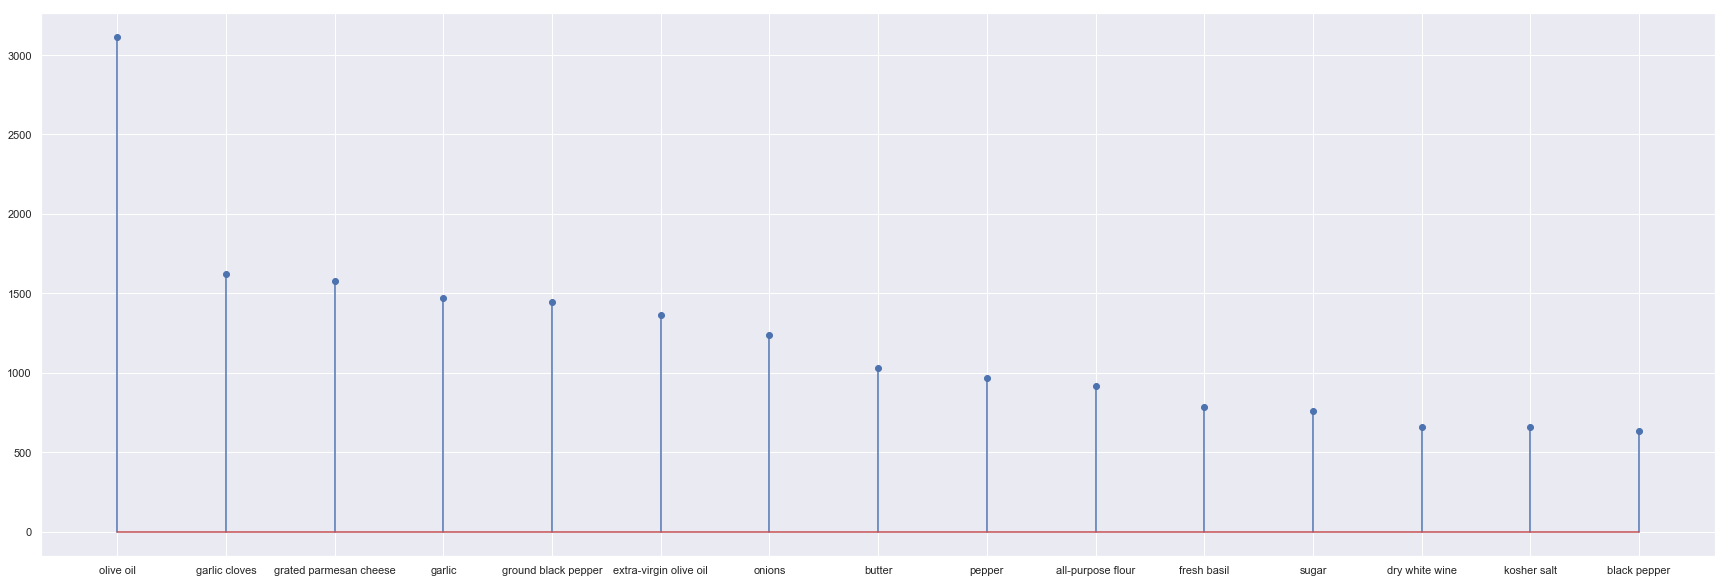

In [33]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['italian'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [34]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# mexican

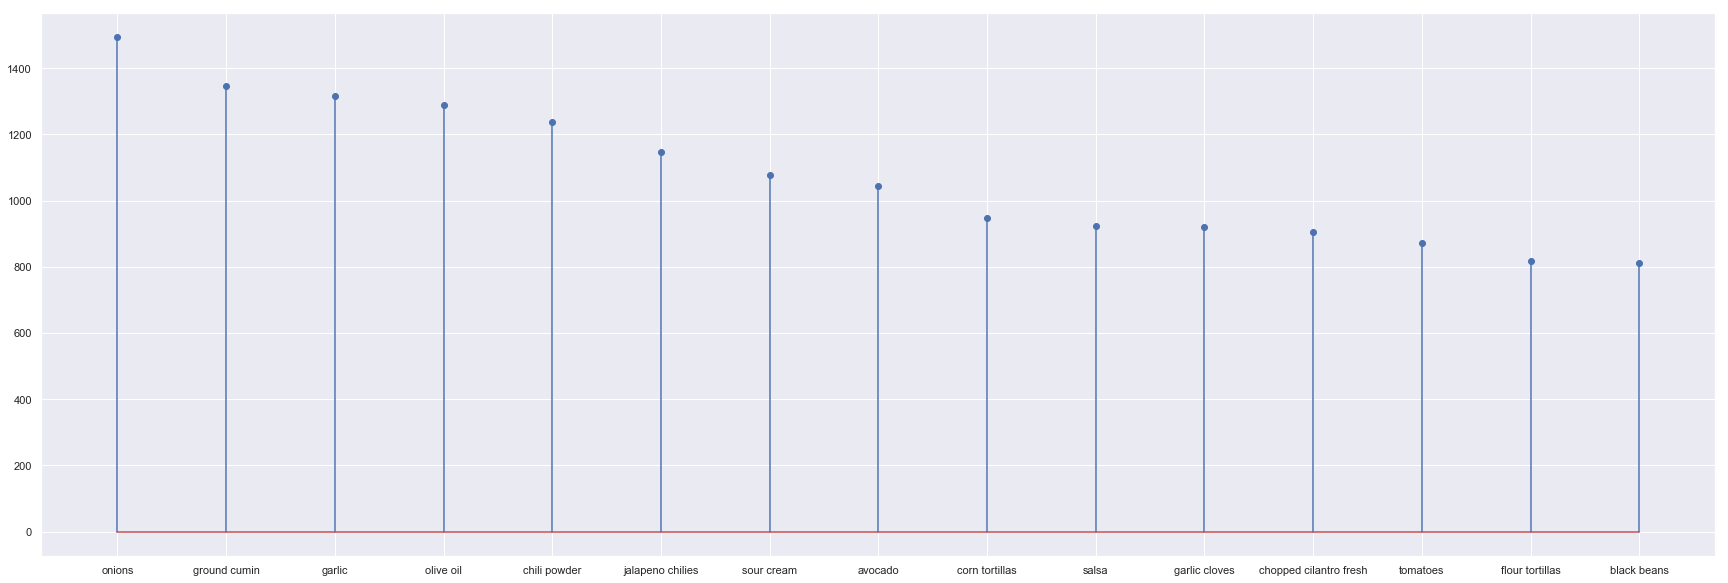

In [35]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['mexican'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [36]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# chinese

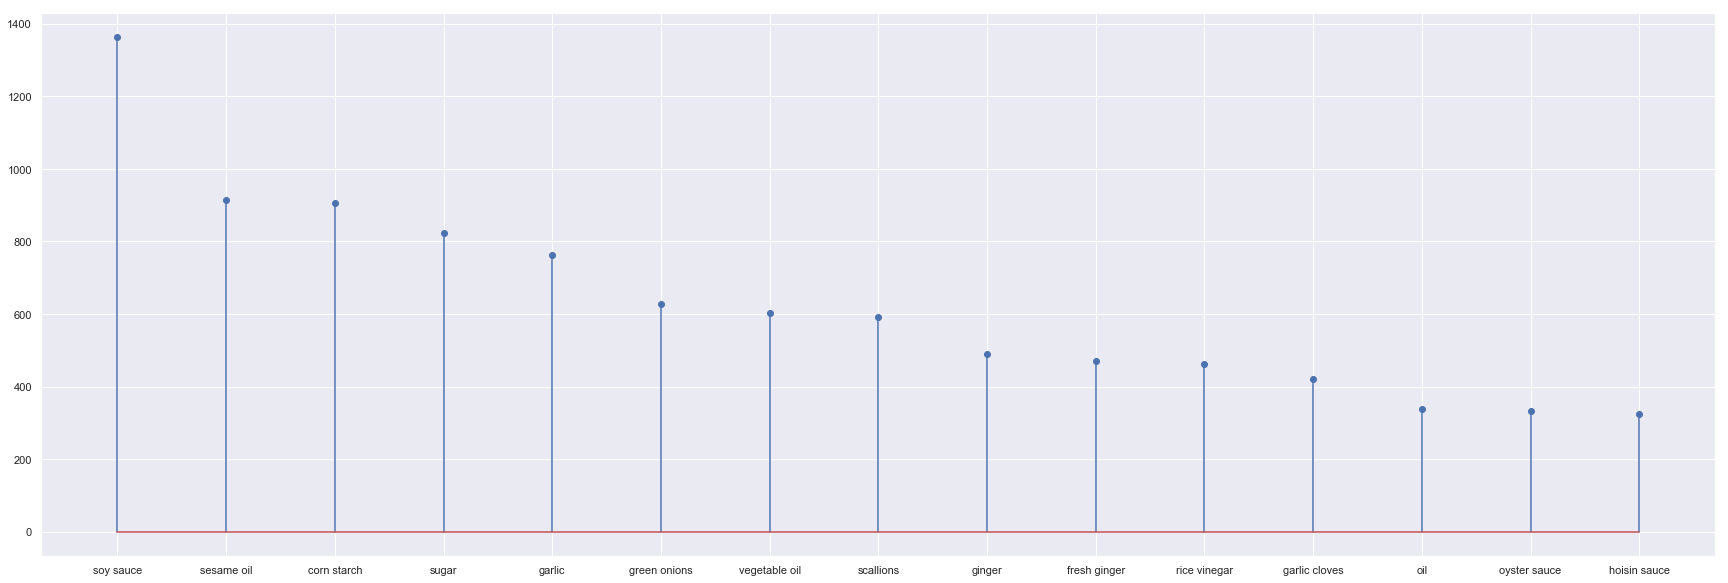

In [37]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['chinese'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [38]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# british

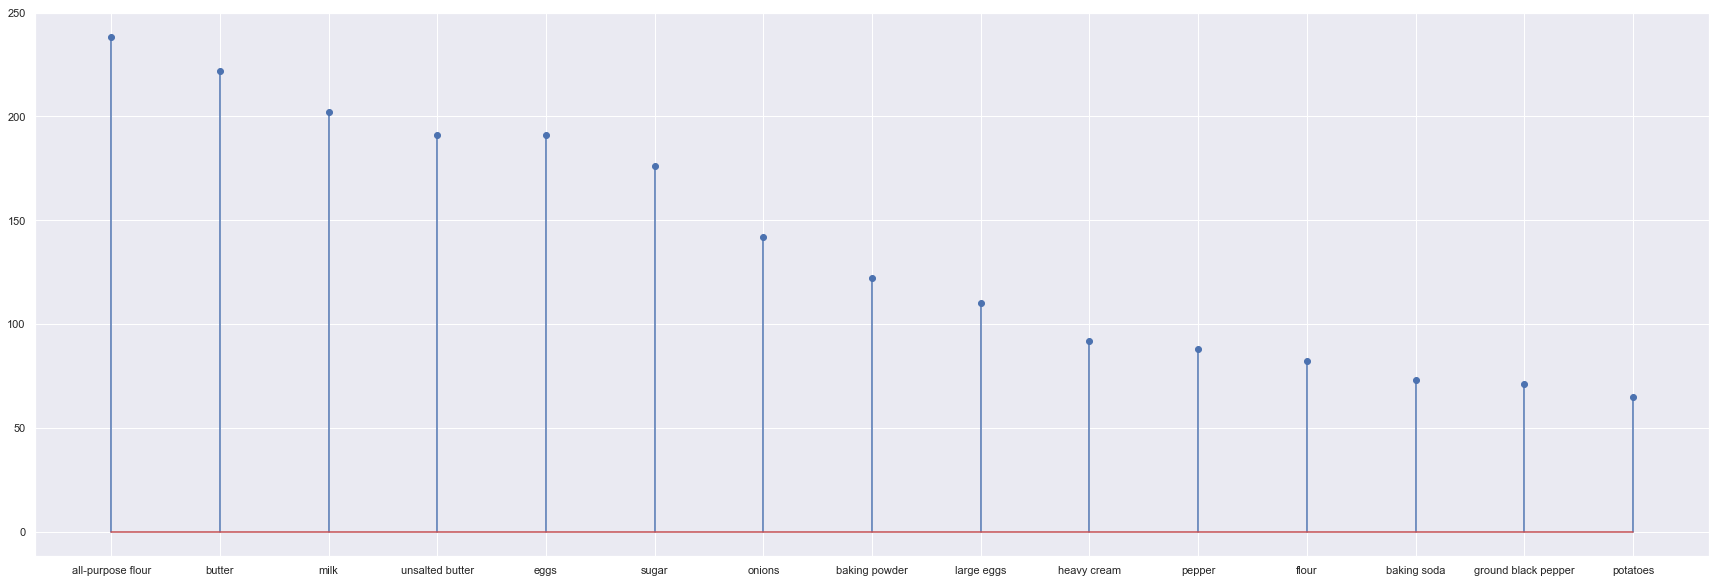

In [39]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['british'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [40]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# thai

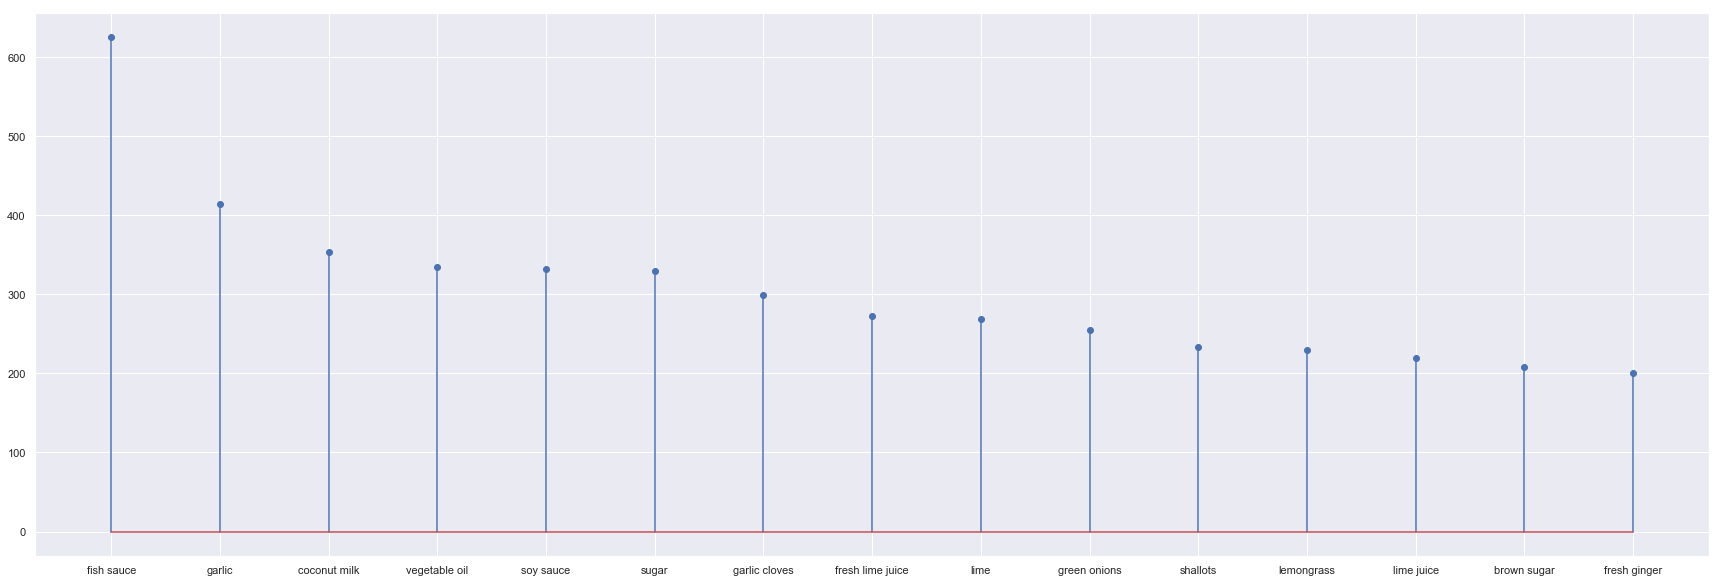

In [41]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['thai'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [42]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# vietnamese

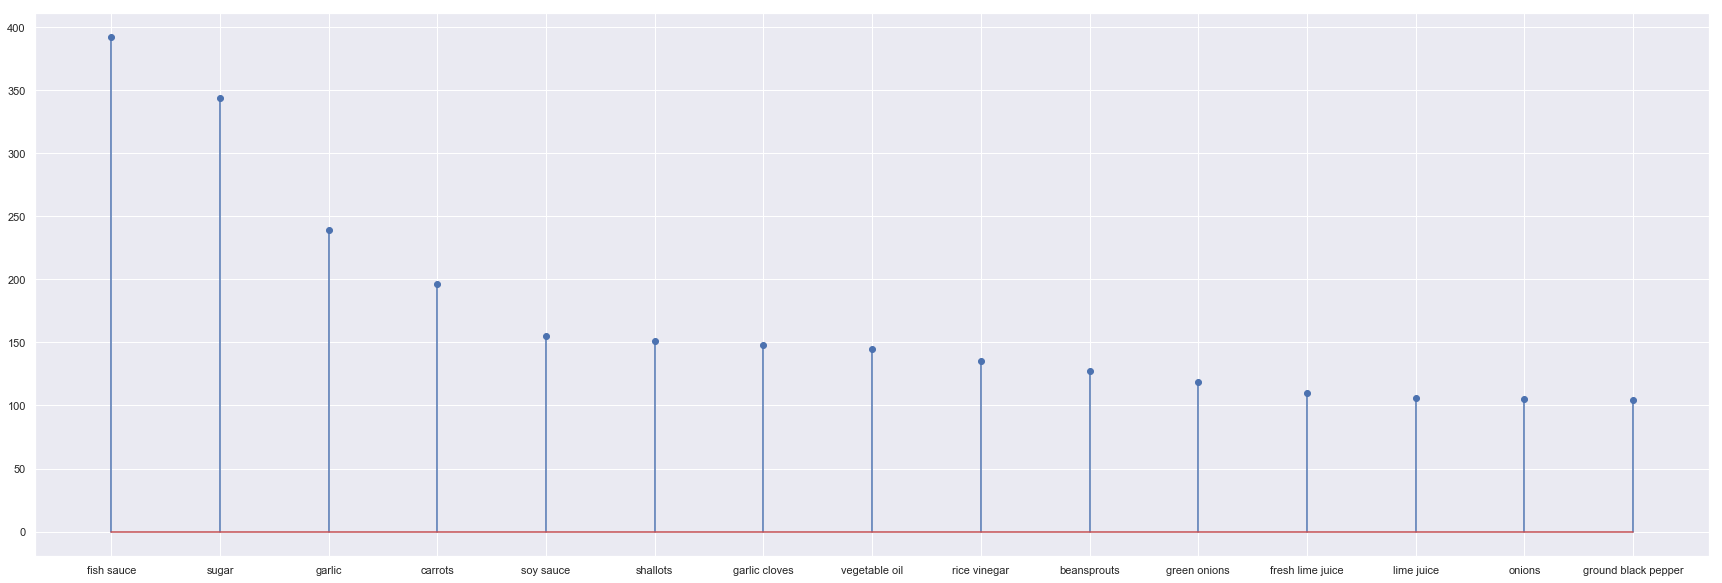

In [43]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['vietnamese'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [44]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# cajun_creole

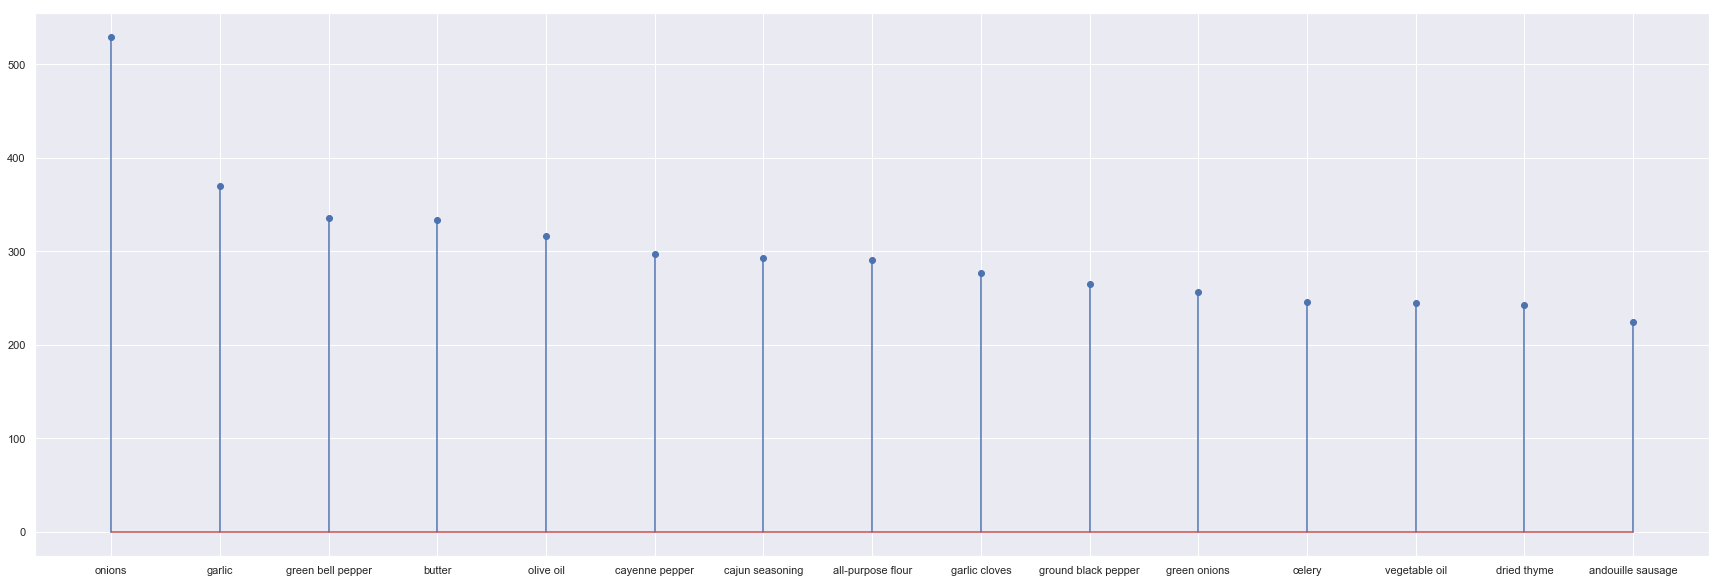

In [45]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['cajun_creole'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [46]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# brazilian

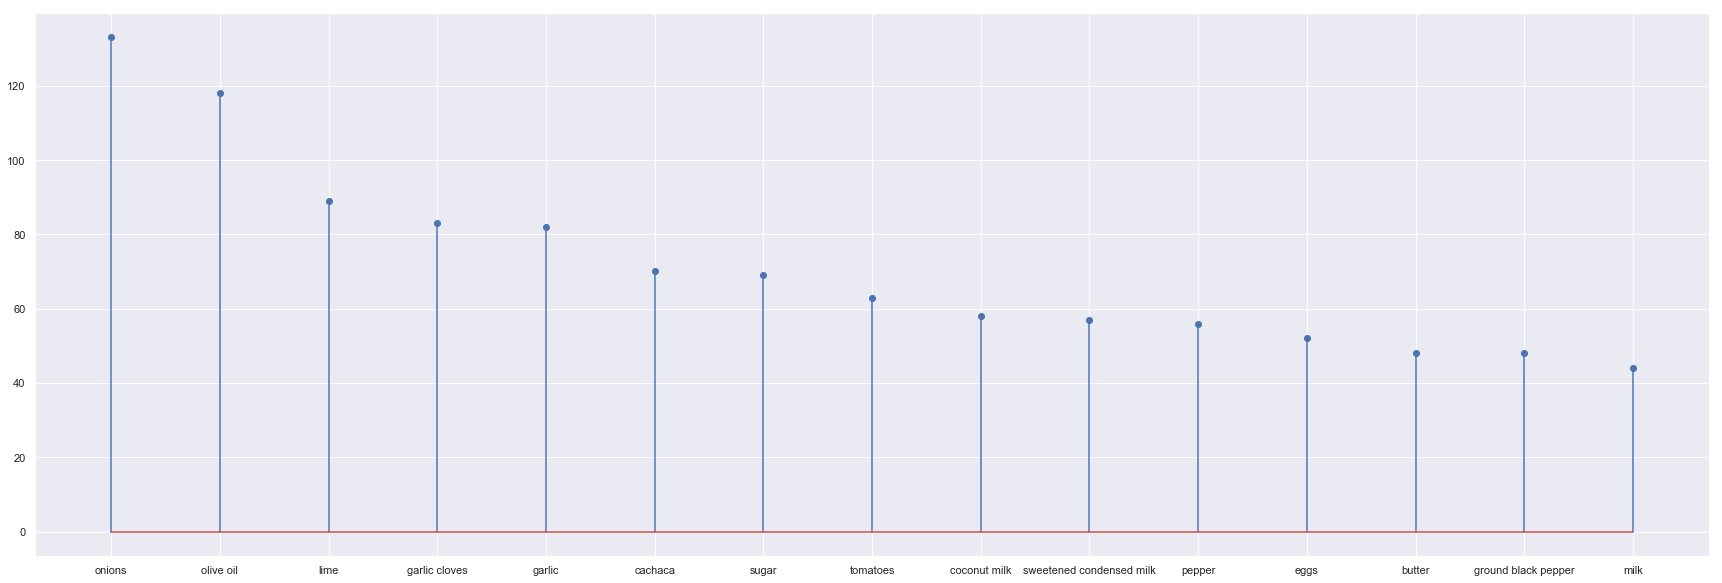

In [47]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['brazilian'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [48]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# french

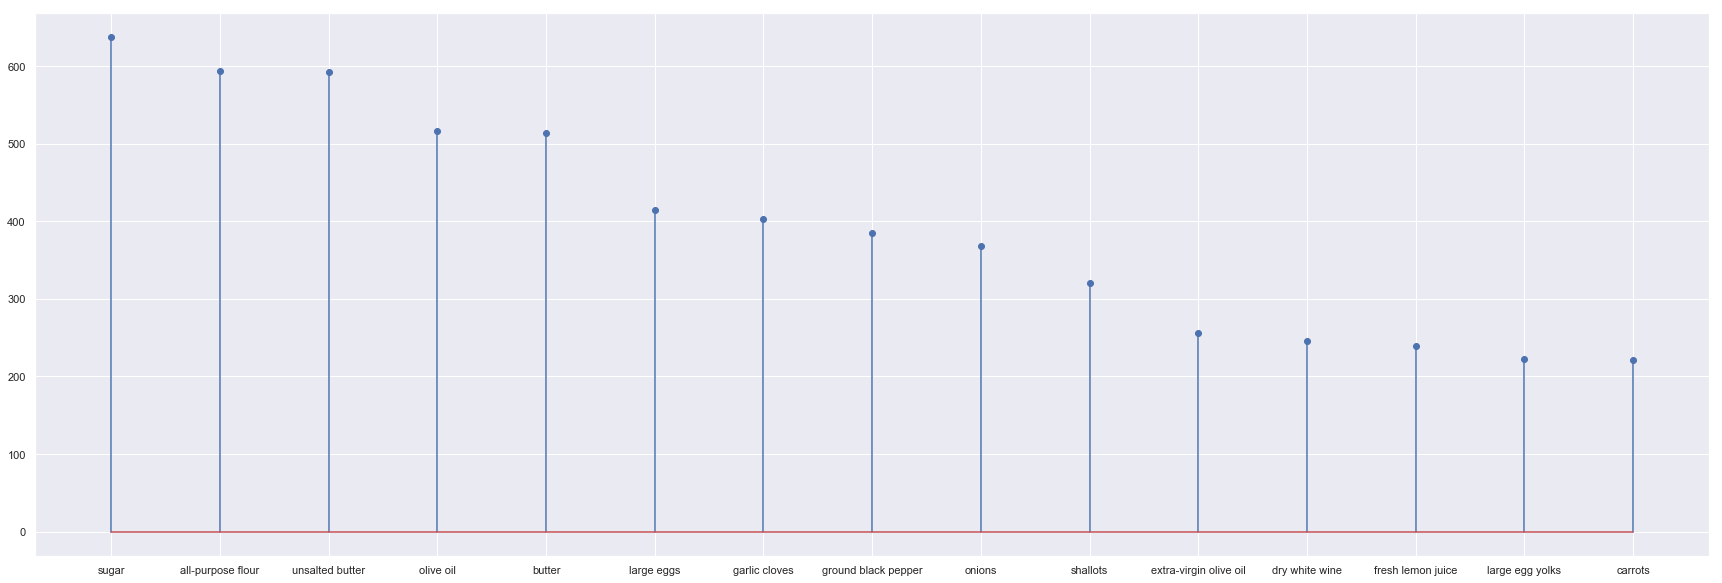

In [49]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['french'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [50]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# japanese

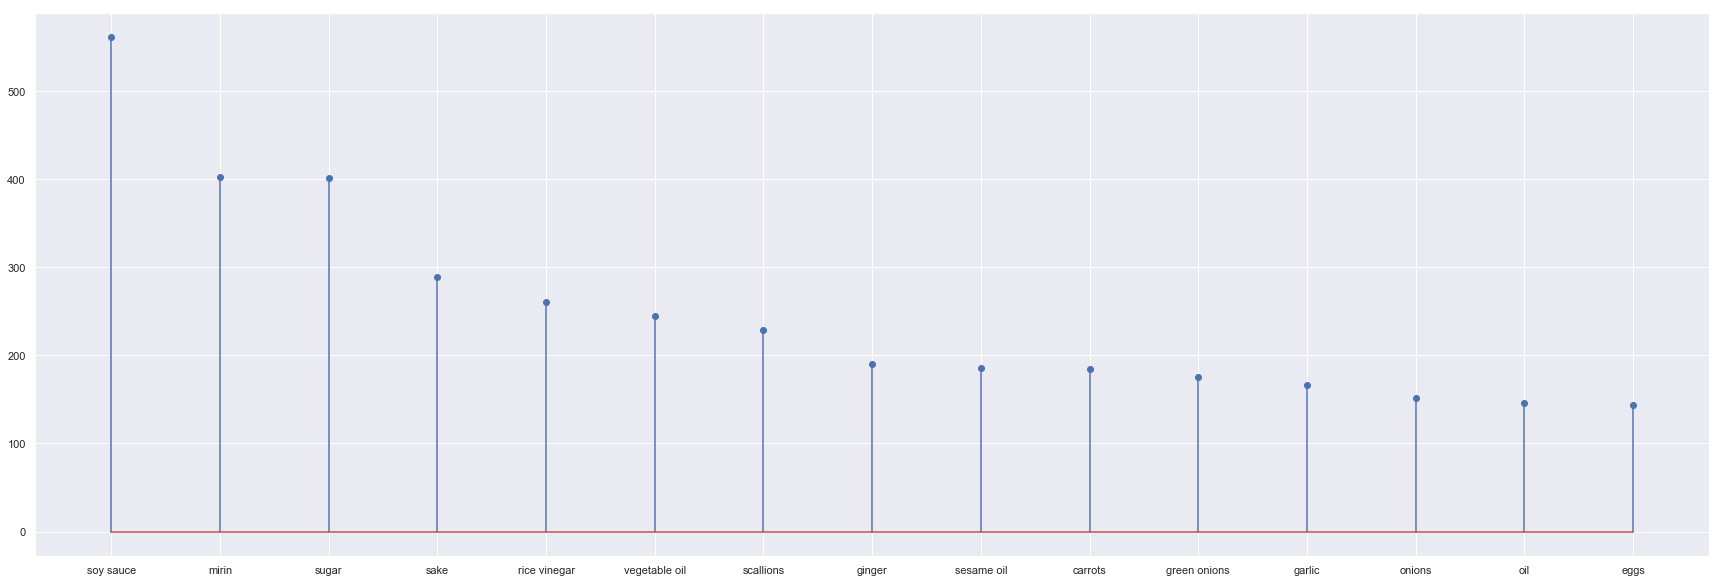

In [51]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['japanese'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [52]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# irish

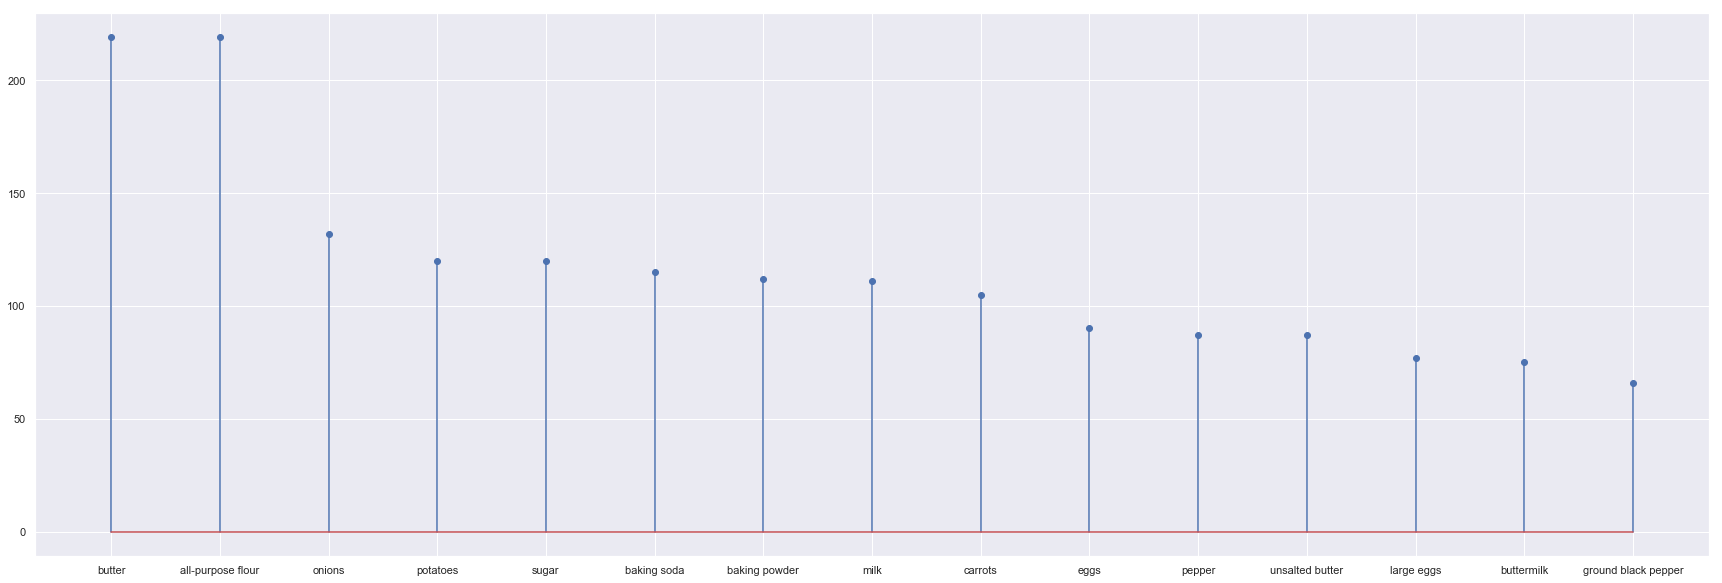

In [53]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['irish'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [54]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# korean

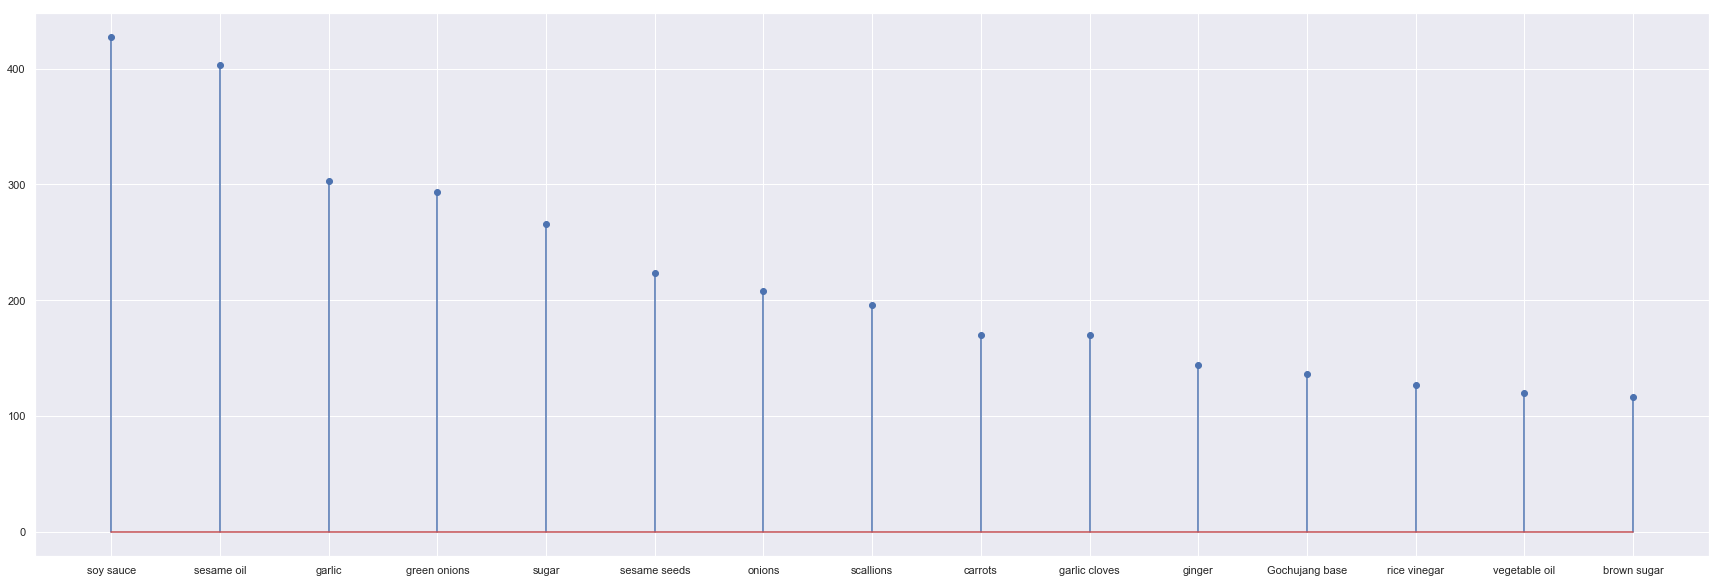

In [55]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['korean'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [56]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# moroccan

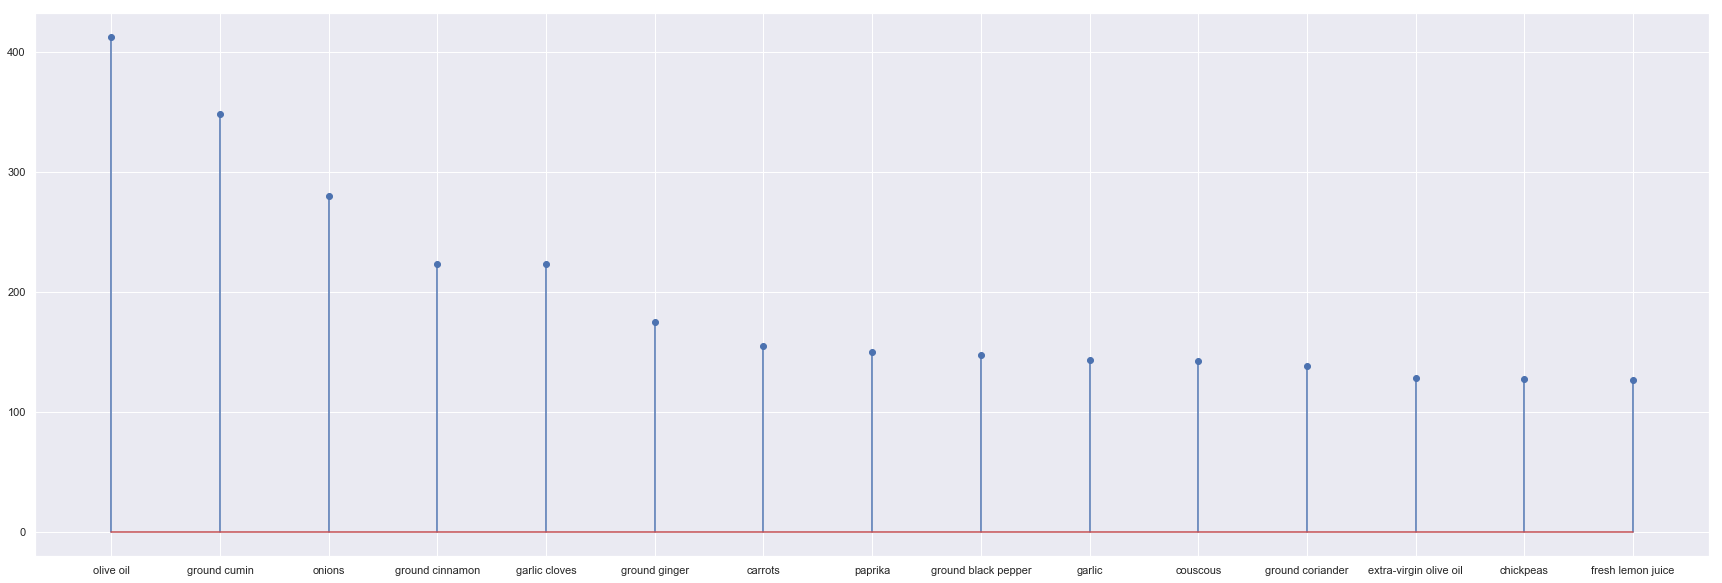

In [57]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['moroccan'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [58]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# russian

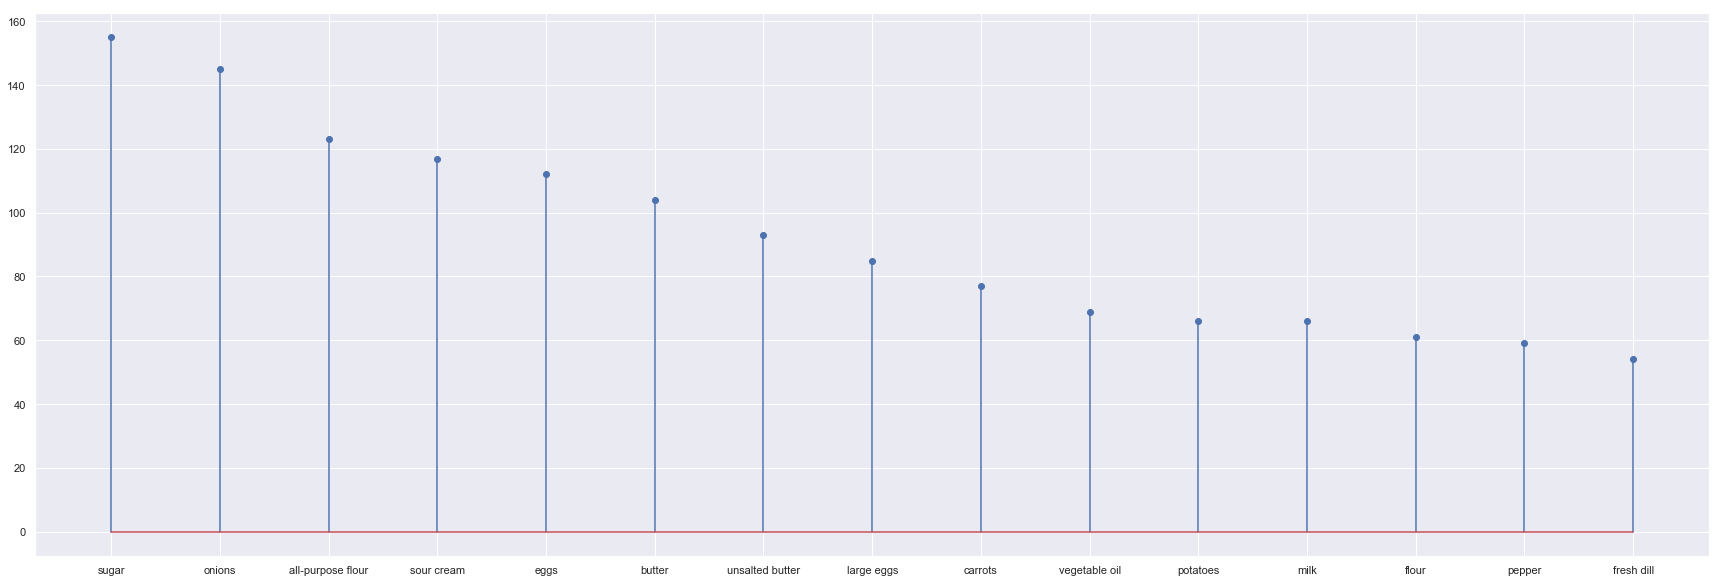

In [59]:
f, axes = plt.subplots(1, 1, figsize=(30, 10))
# Reorder it following the values(top 10 ingredients):
ordered_df_All = completeDataFrameWithoutSalt['russian'].sort_values(ascending = False)
ordered_df = ordered_df_All[:15]
my_range=range(0,15)
 
# Make the plot
plt.stem(ordered_df)
plt.xticks( my_range, ordered_df.index)
for i in ordered_df.index:
    if i not in total_top15_ingredients:
        total_top15_ingredients.append(i)

In [60]:
values= ordered_df
type_list = ordered_df.index
import squarify

x = 0.
y = 0.
width = 50.
height = 50.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=1000, 
    width=1000,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

# What's the relationship between each countries?

In [61]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

i got all top 15 for each cuisine. Create a new dictionary of all top ingredients and cuisine. Show


# How Cuisine are connected by top food

In [62]:
top_ingredients_dict = {'ingredients':total_top15_ingredients}
for cuisine in cuisineList:
    top_ingredients_dict[cuisine] = []
    for i in range(0,len(total_top15_ingredients)):
        top_ingredients_dict[cuisine].append(0)


In [63]:
#create dict to show the prescence of the top 15 food in each cuisine
for cuisine in completeDataFrameWithoutSalt.columns:
    ordered_df_All = completeDataFrameWithoutSalt[cuisine].sort_values(ascending = False)
    ordered_df = ordered_df_All[:15]
    for ingredients in ordered_df.index:
        for i in range(0,len(total_top15_ingredients)):
            if ingredients == total_top15_ingredients[i]:
                top_ingredients_dict[cuisine][i]=1
                break

In [64]:
# 1 = present, 0 = false
top_df = pd.DataFrame(top_ingredients_dict)
top_df.set_index('ingredients')

,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
ingredients,,,,,,,,,,,,,,,,,,,,
olive oil,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,0
dried oregano,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
garlic cloves,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,0
feta cheese crumbles,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
extra-virgin olive oil,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
fresh lemon juice,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
ground black pepper,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,0
garlic,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0
pepper,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [65]:
#create dict for all the cuisine connection
network_dict = {'from':[],'to':[],'value':[]}
for cuisine1 in top_df.columns:
    for cuisine2 in top_df.columns:
        value = 0
        if (cuisine1 != cuisine2) and cuisine2 not in network_dict['from'] :
            for i in range(0,len(total_top15_ingredients)):
                if top_df[cuisine1][i] == 1 and top_df[cuisine2][i] == 1:
                    value +=1
        if value>=5:                              #have at least 5 common ingredients
            network_dict['from'].append(cuisine1)
            network_dict['to'].append(cuisine2)
            network_dict['value'].append(value)
    

In [66]:
network_df = pd.DataFrame(network_dict)
pd.options.display.max_rows = 1000
network_df

,from,to,value
0,greek,filipino,5
1,greek,jamaican,5
2,greek,spanish,8
3,greek,italian,7
4,greek,mexican,5
5,greek,cajun_creole,5
6,greek,brazilian,7
7,greek,french,6
8,greek,moroccan,7
9,southern_us,filipino,6


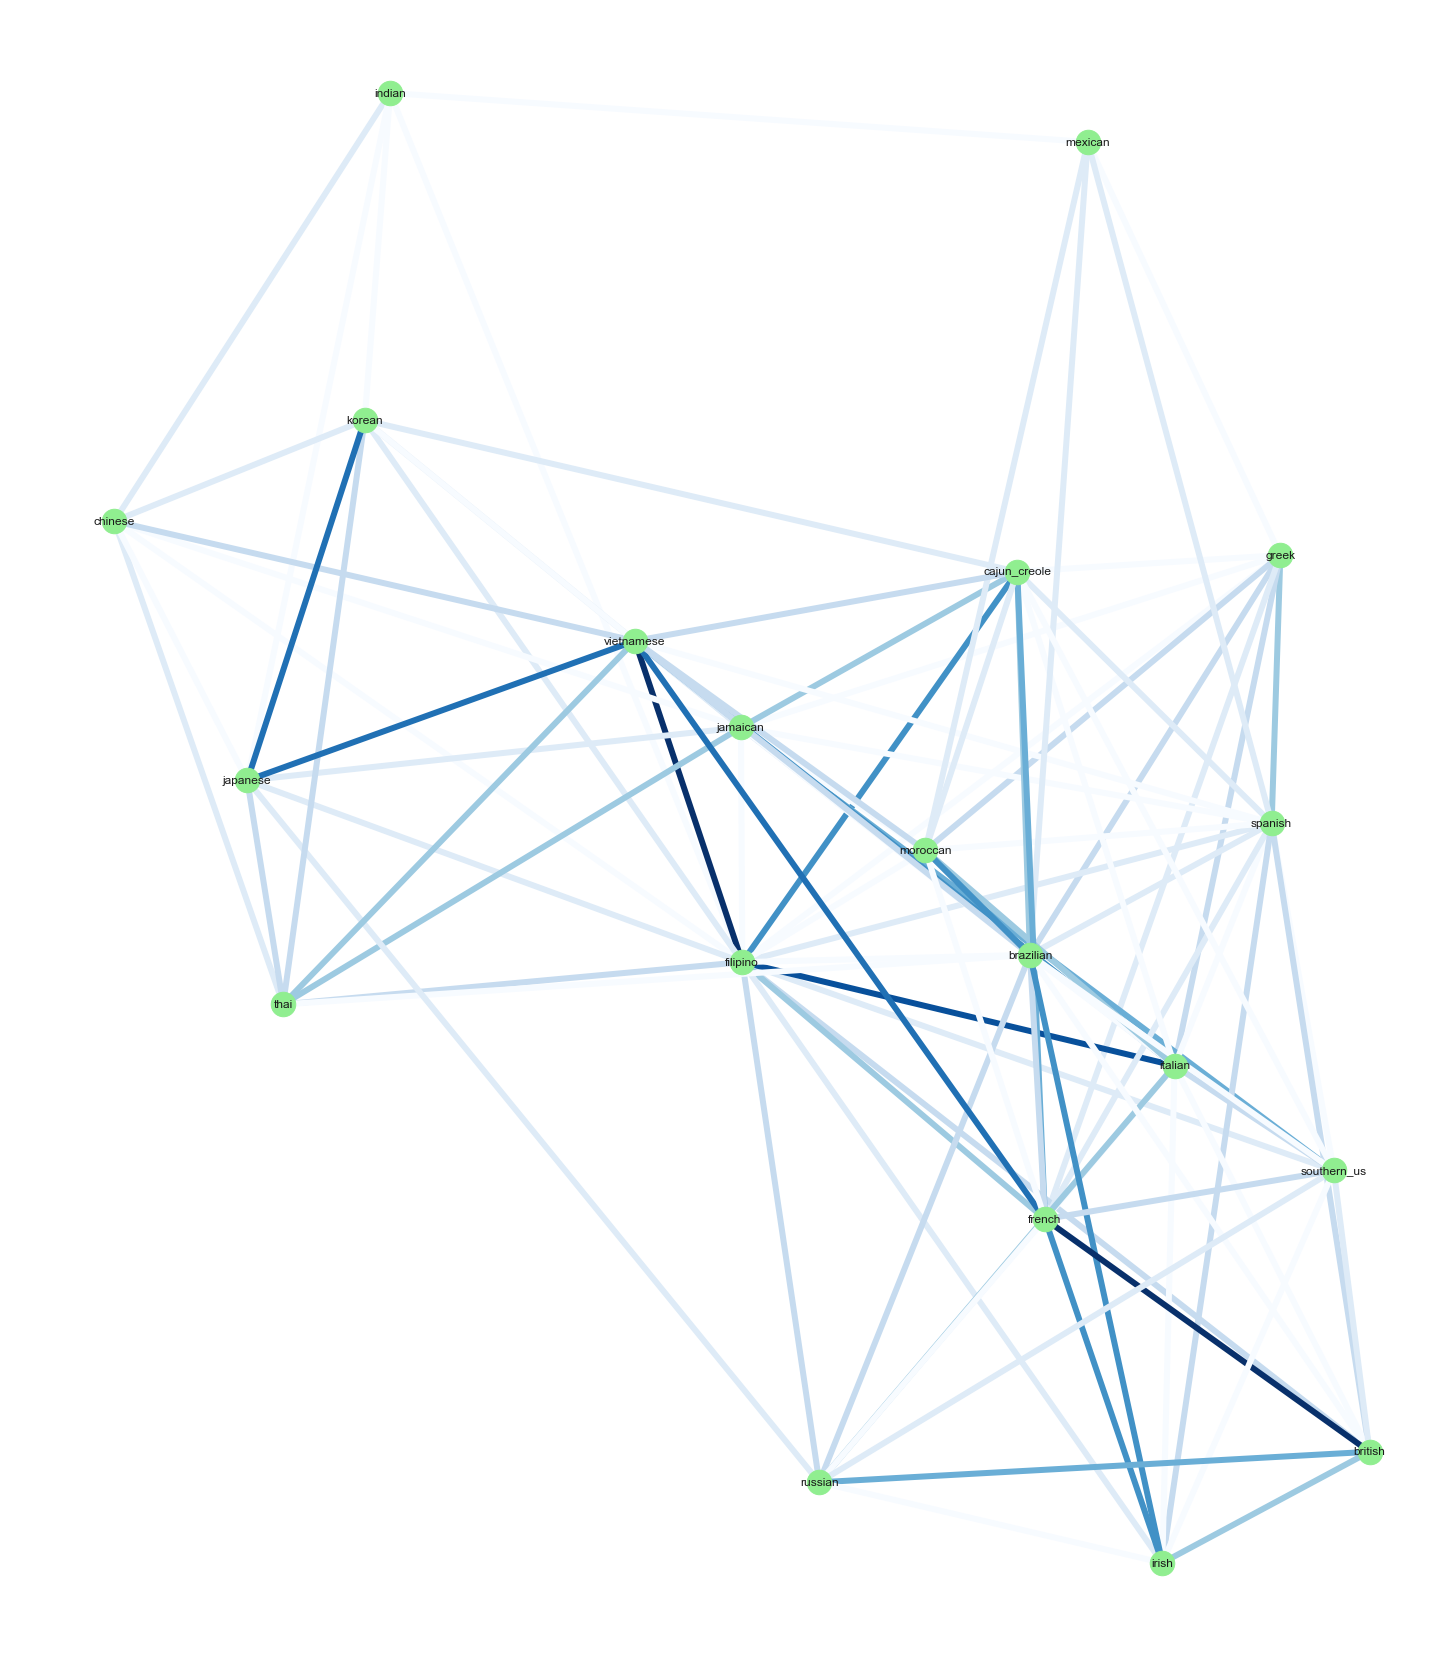

In [67]:
f, axes = plt.subplots(1, 1, figsize=(25, 30))
# Build your graph
G=nx.from_pandas_edgelist(network_df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=600, edge_color=network_df['value'], width=6.0, edge_cmap=plt.cm.Blues)


In [68]:
network_df[:18]['value']

0      5
1      5
2      8
3      7
4      5
5      5
6      7
7      6
8      7
9      6
10     5
11     5
12     6
13    12
14     5
15     7
16     7
17    13
Name: value, dtype: int64